## 6.2.2 Random Forests (Part 2; python models)

```
date: "Block 06"
author: "Daniel Lawson"
email: dan.lawson@bristol.ac.uk
output: html_document
version: 2.0.0
```

# 0. Overview

Here we get a random forest classifier running on the kddcup data. We start by importing data from R, after the standard boiler plate stuff.

## 0.1 Requirements

The following is how to install the provided requirements.

Note: we **autogenerate** the requirements. We could do it with a `requirements.txt` file, but these force version changes in your system. Probably you will be fine with whichever version, so we'll do it another way. The requirements here are:

In [1]:
!pip install matplotlib numpy pandas scikit_learn seaborn session_info

These requirements were generated the following way (which will clear my output when you run):

In [2]:
!pip install pipreqsnb
!pipreqsnb --savepath requirements-block06.txt block06-TreesAndForests_Part2.ipynb

pipreqs  --savepath requirements-block06.txt /Users/madjl/teach/dst-private/Workshops/__temp_pipreqsnb_folder
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in requirements-block06.txt


In [3]:
print("\nREQUIREMENTS:\n")
with open('requirements-block06.txt', 'r') as f:
    print(f.read())


REQUIREMENTS:

matplotlib==3.6.0
numpy==1.23.3
pandas==1.5.0
scikit_learn==1.1.3
seaborn==0.13.0



And if you wanted to install the exact same version that I had, you could take that file and install it with the commnand below. To actually do this, you'll have to create the requirements file by copying the text below REQUIREMENTS: above into it first, since I don't provide this file for simplicity. The command is:

`!pip install -r requirements-block06.txt`

This is the recommended way for you to do projects. However, for workshops, we tend to use better maintained packages.

Here is how I cleaned out the version numbers:

In [4]:
file = open('requirements-block06.txt','r')
reqlist = file.readlines()
simple= [x.split("==")[0] for x in reqlist]
print ("To install current versions, run:")
"!pip install " +" ".join(simple) 

To install current versions, run:


'!pip install matplotlib numpy pandas scikit_learn seaborn'

# 0.2 General imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline 

# 1.1 Import Data and R analysis

### 1.1.1 Reading the data

This requires telling python that the first column is the "index column" (like row names in R). We use the function pd.read_csv. We do a little examination to make sure its ok.

In [6]:
r_train=pd.read_csv('https://raw.githubusercontent.com/dsbristol/dst/master/data/conndataC_train.csv',index_col=0) 
r_test=pd.read_csv('https://raw.githubusercontent.com/dsbristol/dst/master/data/conndataC_test.csv',index_col=0) 

In [7]:
r_train.head()

,duration,orig_bytes,resp_bytes,orig_ip_bytes,resp_ip_bytes,http
64203,0.173953,5.723585,6.198479,6.352629,6.486161,0
208055,0.029559,5.894403,8.194229,6.599870,8.278936,0
72988,0.058269,6.232448,9.003808,6.734592,9.053219,0
222960,0.779325,6.848005,7.561122,7.239933,7.803843,1
71198,0.019803,6.202536,9.005896,6.716595,9.050524,0


Convert the data into the format expected by random forest in python.

In [8]:
r_train_features= np.array(r_train)[:,0:4]
r_train_labels= np.array(r_train)[:,5].ravel() # this becomes a 'horizontal' array

r_test_features= np.array(r_test)[:,0:4]
r_test_labels= np.array(r_test)[:,5].ravel() 

In [9]:
r_train_labels

array([0., 0., 0., ..., 0., 1., 0.])

### 1.1.2 Reading R model ROC

We also need the output of the Random Forest that was run in R (**block06-TreesAndForests_Part1.Rmd**).

You should really save this locally, but for convenience I've added it to the github repo.

In [10]:
r_rf_roc=pd.read_csv('https://raw.githubusercontent.com/dsbristol/dst/master/data/conndataC_RFroc.csv',index_col=0) # EDIT

## 1.2 Run a Random Forest Classifier. 

A first question is how should we access the prediction probabilities? To examine this, look up how Python handles Random Forests. How does it differ to R?

First we simply run the classifier - this is very standardized in `sklearn`.

In [11]:
from sklearn.ensemble import RandomForestClassifier
rdata_rf = RandomForestClassifier(n_estimators=100, max_features=3)
rdata_rf.fit(r_train_features,r_train_labels);

In [12]:
## ?RandomForestClassifier
## Tells us that the answer is in `predict_proba`:

In [13]:
rdata_rf_predictions=rdata_rf.predict_proba(r_test_features)

The below accesses the probability of class 1, but generalises to multi-class datasets.

In [14]:
rdata_rf_predictions[:,1] 

array([0.  , 1.  , 0.98, ..., 0.89, 1.  , 0.96])

## 1.2.1 ROC curve dataset using the function roc_curve.

We'll extract an ROC curve and take a look at how Python represents it.

In [15]:
from sklearn.metrics import roc_curve
rdata_rf_fpr, rdata_rf_tpr, _ = roc_curve(r_test_labels,rdata_rf_predictions[:,1]) 

In [16]:
rdata_rf_tpr

array([0.        , 0.70735786, 0.74749164, 0.7826087 , 0.79431438,
       0.80936455, 0.81772575, 0.83110368, 0.8361204 , 0.83946488,
       0.84615385, 0.86120401, 0.86287625, 0.86956522, 0.87959866,
       0.8812709 , 0.88795987, 0.89632107, 0.89966555, 0.90133779,
       0.90802676, 0.91137124, 0.91137124, 0.91471572, 0.9180602 ,
       0.91973244, 0.91973244, 0.92307692, 0.93311037, 0.93478261,
       0.93478261, 0.93812709, 0.94481605, 0.94816054, 0.94816054,
       0.94983278, 0.94983278, 0.95652174, 0.95652174, 0.95652174,
       0.96488294, 0.96822742, 0.96989967, 0.96989967, 0.97157191,
       0.97324415, 0.97324415, 0.97491639, 0.97491639, 0.97658863,
       0.97658863, 0.97658863, 0.97658863, 0.97658863, 0.97658863,
       0.97826087, 0.97826087, 0.97826087, 0.97826087, 0.97826087,
       0.97993311, 0.98160535, 0.98160535, 0.98327759, 0.98494983,
       0.98494983, 0.98829431, 0.98829431, 0.98829431, 0.98829431,
       0.98829431, 0.98829431, 0.98829431, 0.98996656, 0.98996

Now we will plot the actual ROC curve, showing the R implementation in red and the python implementation in blue. Which is better? Why?

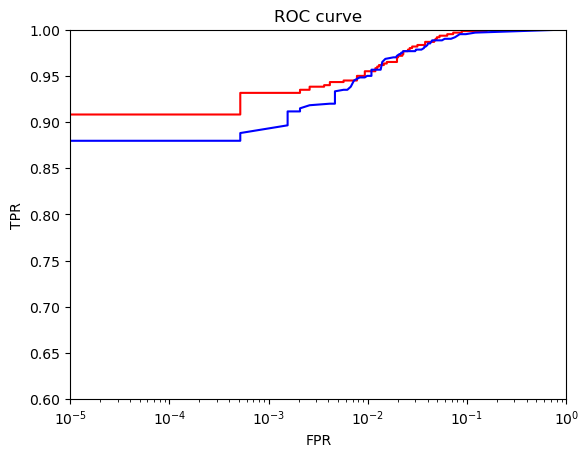

In [17]:
#plt.clf()
plt.semilogx(np.array(r_rf_roc)[:,0], np.array(r_rf_roc)[:,1],'r')
plt.semilogx(rdata_rf_fpr,rdata_rf_tpr,'b')
plt.xlim([0.00001,1])
plt.ylim([0.6,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

The R Random Forest defaults are producing a true positive rate about 5% higher at very low false positive rate! 

#### See Q6.2 in Block 6 Portfolio

about interpreting these results.

# 2. Natively data processing

We will reprocess the data from scratch. Note that this gives us a **different** test/train split to what we had in R, which would invalidate comparisons. We therefore only compare models below.

# 2.1 Reading data

Here we go back to the KDD cup [10%](http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz) data, with its [column names](http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names). If you kept your code in `/code` and data in `/data` then this will work for you, otherwise download again or change the locations below.

(We first met this data in `block01-EDA.Rmd`)

Reading in the header. Its a big clunky to make a list out of the strange format that the data are provided in. I've provided code for this for the future.

In [18]:
header=pd.read_csv('../data/kddcup.names',sep="\t", header=None,skiprows=1).iloc[:,0].tolist()
colnames=[str(x).split(':')[0] for x in header]+['normal']

In [19]:
df = pd.read_csv('../data/kddcup.data_10_percent.gz', sep=",", header=None, names=colnames)

The usual data checking

In [20]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,normal
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


Our data is a bit big for interactive exploration. The methods work fine but you have to wait too long. For this session, lets downsample


In [21]:
print(df.shape)
df=df.sample(100000)
print(df.shape)

(494021, 42)
(100000, 42)


In [22]:
df.dtypes # Usual checking of data 

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

We can see that many fields that we are interested in are called "object". The classifiers don't like this, so we are doing to convert them to factors (analogous to factors in R). These are represented as integer numbers.

Only the class ("normal") will stay in the string (object) format.

**Note:** many changes have been made to the way Python handles factors, and may come again in the future!

In [23]:
#df['protocol_type_cat'] = df[1].astype('category') # Direct one-hot encoding. But only in later versions of pandas.
df['protocol_type'], protocols= pd.factorize(df['protocol_type'])
df['service'], services = pd.factorize(df['service'])
df['flag'], flags    = pd.factorize(df['flag'])
# We have the key to convert back in protocols,services, flag

In [24]:
protocols

Index(['tcp', 'udp', 'icmp'], dtype='object')

In [25]:
df.dtypes

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

Now we extract out features and labels, both in pandas and numpy format

In [26]:
features_pd= df.iloc[:,:df.shape[1]-1]
labels_pd= df.iloc[:,df.shape[1]-1:]
labels= labels_pd.values.ravel() # this becomes a 'horizontal' array, i.e. a row vector

## Not needed here:
## features= np.array(features_pd)

In [27]:
#labels_pd
labels

array(['neptune.', 'neptune.', 'normal.', ..., 'smurf.', 'neptune.',
       'smurf.'], dtype=object)

## 2.2 Saving the data

There are many ways to save data. This is a simple though lazy one: through a pickle file

In python this allows reproduceable test/train data as we used a random seed above. For R use, we'd have to save the X_train/y_train/X_test/y_test objects separately as csvs or similar.

Pickles can store very many types of object, but those that use memory pointers don't work (we encounter these when working with large scale data).

In [28]:
# Save a python object into a picle file
import pickle
pickle.dump( features_pd, open( "06-features_pd.pickle", "wb" ) )
pickle.dump( labels, open( "06-labels.pickle", "wb" ) )

## 2.3 Test/train split

Now separate data in train set and test set

Create training and testing vars

Note: if train_size + test_size < 1.0 we are subsampling. This is useful for making test code run faster.

Use small numbers for slow classifiers, as KNN, Radius, SVC,...

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features_pd, labels, train_size=0.5, test_size=0.5,random_state=1)
print ("X_train, y_train:", X_train.shape, y_train.shape)
print ("X_test, y_test:", X_test.shape, y_test.shape)

X_train, y_train: (50000, 41) (50000,)
X_test, y_test: (50000, 41) (50000,)


# 3. Training Classifiers

Now we have everything we need to start to run the classifiers. Notice the wide range of tuning parameters that are available...

## 3.1 Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(n_jobs=-1, random_state=3, n_estimators=100)
#, max_features=0.8, min_samples_leaf=3, n_estimators=500, min_samples_split=3, random_state=10, verbose=1)

trained_model= clf.fit(X_train, y_train)


In [31]:
print( "Score: ", trained_model.score(X_train, y_train))

Score:  1.0


The score is 1! Is this a rounding error, or severe overfitting?

In [32]:
y_train

array(['normal.', 'normal.', 'smurf.', ..., 'smurf.', 'normal.', 'smurf.'],
      dtype=object)

In [33]:
# Predicting
y_pred = clf.predict(X_test)

This is how we make a confusion matrix in sklearn. Also how we evaluate the loss function for categorical labels. We use a "zero/one" loss: score 0 for the wrong class, 1 for the right one. Its not the best choice of loss for all applications!

### 3.1.1 confusion_matrix

Here we make and display (in text and on image) the confusion matrix.

In [34]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test, y_pred) # EDIT to make a confusion matrix from TEST (rows) and PRED ( columns)
print ("Confusion matrix:\n", results)

Confusion matrix:
 [[  209     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [    0     1     0     0     0     0     0     0     0     0     1     0
      0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     1     0
      0     0     0     0     0     0     0]
 [    0     0     0     6     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [    0     0     0     0   106     0     0     0     0     0     2     0
      0     0     0     0     0     0     0]
 [    0     0     0     0     0     2     0     0     0     0     1     0
      0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     2     0
      0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     2     0
      0     0     0     0     0     0     0]
 [    0     0     0     0    

Since this isn't trivial to read, we'll also make a heatmap using seaborn. We make it with log10 of the results.

In [35]:
# sresults=[x/(1+x.sum()) for x in results] # for relative row sums
sresults=[np.log(0.01+x) for x in results] # For raw logged values. 
## Note that we map 0 to a large negative value using an offset of 0.01, which is helpful for plotting.

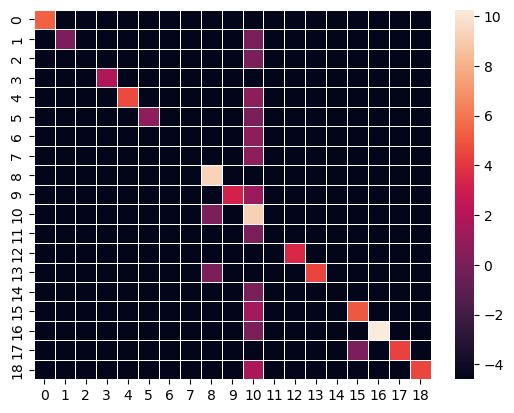

In [36]:
import seaborn as sns

ax = sns.heatmap((sresults), linewidth=0.5) 
plt.show()

So does the score of 1 mean the error is really zero? We can check by not rounding 1-eps to 1, and using the zero_one_loss function.

In [37]:
from sklearn.metrics import zero_one_loss
error = zero_one_loss(y_test, y_pred) 
print ("Error: ", error)

Error:  0.0005399999999999849


# 3.2 Decision Trees

Now we'll evaluate two different models, the decision tree and logistic regression.

In [38]:
from sklearn.tree import DecisionTreeClassifier
cld = DecisionTreeClassifier(criterion='gini', splitter='best', 
                             max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features=None, 
                             random_state=None, max_leaf_nodes=None, class_weight=None)
# other parameters: min_impurity_decrease=0.0, 

trained_model_d= cld.fit(X_train, y_train)
y_pred_d = cld.predict(X_test)
error_d = zero_one_loss(y_test,y_pred_d) 
print(error_d)

0.0011600000000000499


# 3.3 Logistic Regression

Now Logistic Regression. This is quite a bit slower...

In [39]:
from sklearn.linear_model import LogisticRegression
cll = LogisticRegression()

trained_model_l= cll.fit(X_train, y_train)
y_pred_l = cll.predict(X_test)
error_l = zero_one_loss(y_test,y_pred_l) 
print(error_l)

0.01761999999999997


/Users/madjl/envs/jupyter/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Comparison:

In [40]:
print("Error Random Forest",error,"\nError Decision Tree",error_d,"\nError Logistic Regression",error_l)

Error Random Forest 0.0005399999999999849 
Error Decision Tree 0.0011600000000000499 
Error Logistic Regression 0.01761999999999997


# 3.4 Cross Validation Score

Here we use the function cross_val_score to get a prediction error only using the training dataset. 

Why is this useful?

In [41]:
from sklearn.model_selection import cross_val_score
## ?cross_val_score

In [42]:
cvf= cross_val_score(clf,X_train,y_train,cv=10) 

/Users/madjl/envs/jupyter/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [43]:
cvf

array([0.999 , 0.9992, 0.9994, 0.9998, 0.9996, 0.9996, 0.9992, 0.9994,
       0.9994, 0.9992])

## 3.4.1 relative performance

Are the cross validation errors higher or lower than the error in the test dataset? Check by writing an iterator over cvf. What would we expect?

[0.00046000000000001595, 0.000260000000000038, 6.0000000000060005e-05, -0.00034000000000000696, -0.000140000000000029, -0.000140000000000029, 0.000260000000000038, 6.0000000000060005e-05, 6.0000000000060005e-05, 0.000260000000000038]


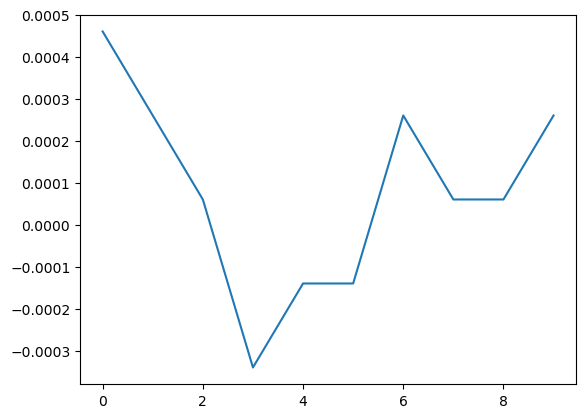

In [44]:
%matplotlib inline
# Compare the error in the test dataset to that learned using CV, vs that learned using the trained data
import matplotlib.pyplot as plt
print([(1-x)-error for x in cvf])
plt.plot([(1-x)-error for x in cvf])

#### See Q6.3 from Block 6 portfolio

For a discussion of these results.

# 4. Investigating Random Forests

We examine the performance as a function of the number of trees, by fitting a random forest with a different number of trees, and gathering the scores (in both the training and the test dataset).

## 4.1 How does the number of trees affect performance?

We train a RandomForestClassifier with 1-10 trees. We store the scores on left out and training data.

In [45]:
scores=[]
trainscores=[]
for ntrees in range(1,11):
    tmpcf=RandomForestClassifier(n_estimators=ntrees)
    tmp_trained_model= tmpcf.fit(X_train, y_train)
    tmp_y_pred = tmp_trained_model.predict(X_test)
    tmp_y_pred_train = tmp_trained_model.predict(X_train)
    tmp_test_error = zero_one_loss(y_test,tmp_y_pred)
    tmp_train_error = zero_one_loss(y_train,tmp_y_pred_train)
    scores.append(1-tmp_test_error)
    trainscores.append(1-tmp_train_error)


In [46]:
scores

[0.99844,
 0.99888,
 0.99894,
 0.99924,
 0.99934,
 0.9993,
 0.99938,
 0.99938,
 0.99924,
 0.99938]

### 4.1.1 prediction error as a function of the number of trees

Here we plot the prediction error as a function of the number of trees. 

We will add the original analysis from above that had 102 trees.

In [47]:
scoresb=scores[0:10]
scoresb.append(1-error) # append the big run we did at the beginning
scoresb=pd.DataFrame(scoresb).transpose() # Convert to data frame for naming
scoresb.columns=[str(x) for x in list(range(1,11))+[102]] # The number of trees that we used
scoresb

,1,2,3,4,5,6,7,8,9,10,102
0,0.99844,0.99888,0.99894,0.99924,0.99934,0.9993,0.99938,0.99938,0.99924,0.99938,0.99946


/Users/madjl/envs/jupyter/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


Text(0.0, 1.0, 'score vs number of trees')

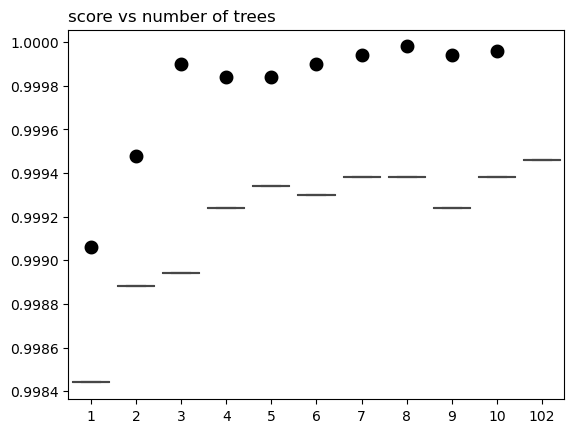

In [48]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.boxplot(data=scoresb) ##  lines: the test dataset performance
ax=plt.scatter(list([range(0,10)]),trainscores,c='black',linewidths=4) 
## Black points: the training performance
## Black lines: the test performance
plt.title("score vs number of trees", loc="left")

## 4.1.2 Feature importance

Examine the following code and output. What can you conclude about the importance of features as calculated by Random Forests?

In [49]:
from sklearn.ensemble import RandomForestRegressor
size = 10000
np.random.seed(seed=1)
X_seed = np.random.normal(0, 1, size)
X0 = X_seed + np.random.normal(0, 1, size)
X1 = X0 + np.random.normal(0, 1, size)
X2 = X_seed + np.random.normal(0, 5, size)
X = np.array([X0, X1, X2]).T
Y = X0 + X1 + X2

rf = RandomForestRegressor(n_estimators=100, max_features=2)
rf.fit(X, Y);
print ("Scores for X0, X1, X2:", list(map(lambda x:str(round (x,3)),
                                    rf.feature_importances_)))

Scores for X0, X1, X2: ['0.102', '0.173', '0.726']


Here we plot the largest 10 feature importances. How would you interpret them?

<AxesSubplot: >

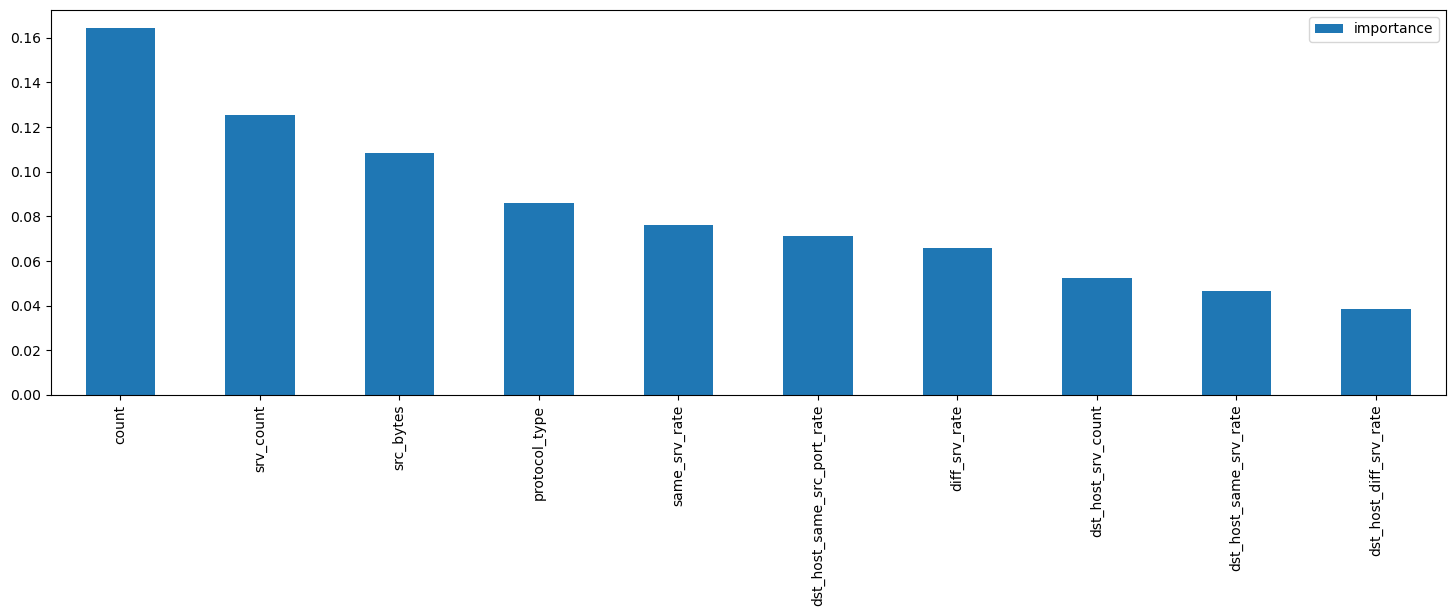

In [50]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

feature_importances.nlargest(10,columns=['importance']).plot(kind='bar',figsize=(18, 5))

#### See Q6.4 in Block 6 portfolio

On interpreting these results.